In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

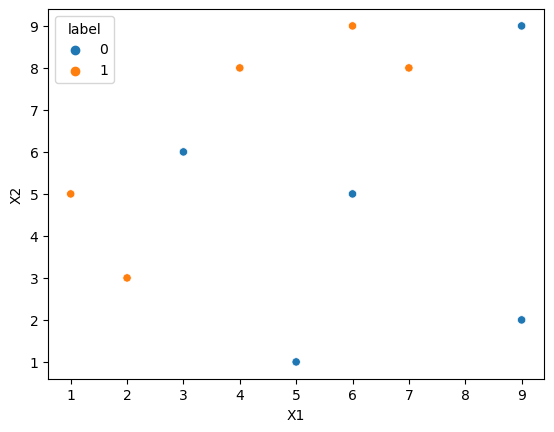

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
df.shape[0]

10

In [7]:
# Step 1 - Assigning weights
df['weights'] = 1/df.shape[0]

The formula to calculate the sample weights is:

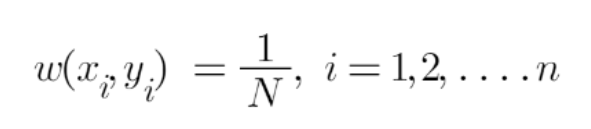

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [12]:
# Step2 - train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

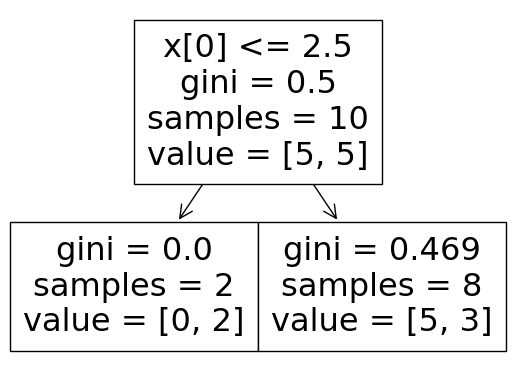

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt1)


<Axes: >

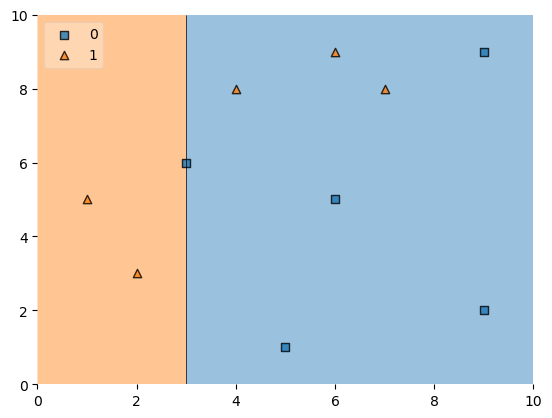

In [14]:
plot_decision_regions(X,y, clf=dt1, legend=2)

In [15]:
df['y_pred'] = dt1.predict(X)

In [16]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [17]:
def calculate_model_weight(error):
    # return 0.5*np.log((1-error)/(error + 0.0000001)) #0.0000001 is added because if no error is occured then it returns 0
    return 0.5*np.log((1-error)/(error))

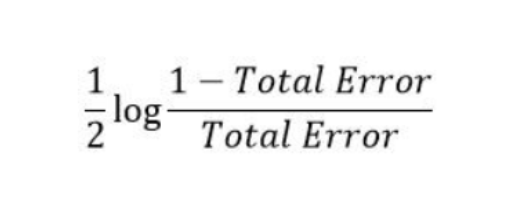


The total error is nothing but the summation of all the sample weights of misclassified data points.

In [18]:
# Step 3 - calculate model weight

alpha1 = calculate_model_weight(0.3) # there are 3 wrong prediction so error is 0.3
alpha1

0.42364893019360184

The amount of, say (alpha) will be negative when the sample is correctly classified.

The amount of, say (alpha) will be positive when the sample is miss-classified.

In [19]:
# Step 4 - Update Weights
def update_row_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)


In [20]:
df['update_weights'] = df.apply(update_row_weights, axis =1)

In [21]:
df

,X1,X2,label,weights,y_pred,update_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


We can see that updated_weights has been changed i.e if the prediction is wrong the weight is increase from 0.1 to 0.152 and if the prediction is correct is then the weight is decrease from 0.1 to 0.065.

In [22]:
df['update_weights'].sum()

0.9165153319682015

The sum of the update_weights must be 0 so we normalized it

In [23]:
df['normalized_weights'] = df['update_weights']/df['update_weights'].sum()

In [24]:
df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [25]:
df['normalized_weights'].sum()

1.0

In [26]:
# Calculating the range of values

In [27]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [28]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [29]:
df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [30]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row ['cumsum_lower']:
                indices.append(index)
    return indices            

In [31]:
# Upsampling
index_values = create_new_dataset(df)

index_values

[6, 8, 5, 7, 5, 6, 8, 0, 5, 5]

In [32]:
# New dataset
second_df = df.iloc[index_values,[0,1,2,3]]

In [33]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [34]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [35]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [36]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

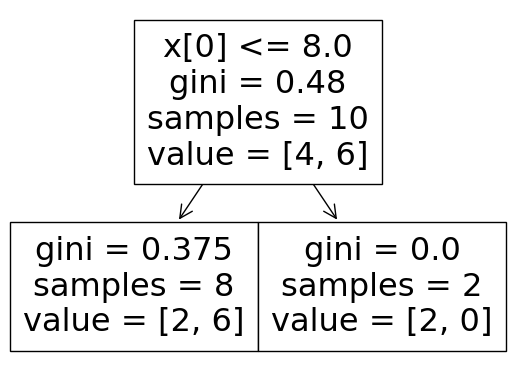

In [37]:
plot_tree(dt2)

<Axes: >

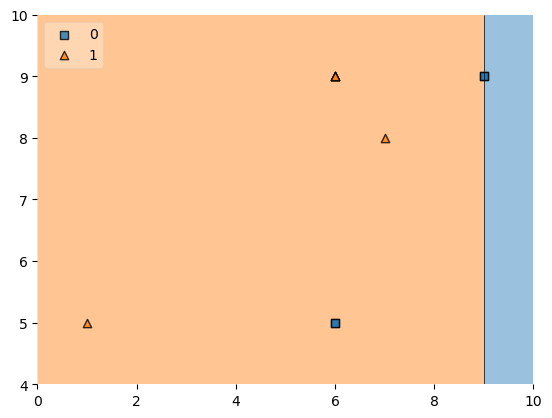

In [38]:
plot_decision_regions(X,y, clf = dt2, legend = 2)

In [39]:
second_df['y_pred'] = dt2.predict(X)

In [40]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [41]:
alpha2 = calculate_model_weight(0.2)

In [42]:
alpha2 #alpha2 is increased beacuse it does less error than first model

0.6931471805599453

In [43]:
# Step 4 - Update weights

def update_row_weights(row, alpha = 0.693):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [44]:
second_df['update_weights'] = second_df.apply(update_row_weights, axis =1)

In [45]:
second_df

,X1,X2,label,weights,y_pred,update_weights
6,6,5,0,0.1,1,0.199971
8,9,9,0,0.1,0,0.050007
5,6,9,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007
6,6,5,0,0.1,1,0.199971
8,9,9,0,0.1,0,0.050007
0,1,5,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007


In [46]:
second_df['normalized_weights'] = second_df['update_weights']/second_df['update_weights'].sum()

In [47]:
second_df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights
6,6,5,0,0.1,1,0.199971,0.249963
8,9,9,0,0.1,0,0.050007,0.062509
5,6,9,1,0.1,1,0.050007,0.062509
7,7,8,1,0.1,1,0.050007,0.062509
5,6,9,1,0.1,1,0.050007,0.062509
6,6,5,0,0.1,1,0.199971,0.249963
8,9,9,0,0.1,0,0.050007,0.062509
0,1,5,1,0.1,1,0.050007,0.062509
5,6,9,1,0.1,1,0.050007,0.062509
5,6,9,1,0.1,1,0.050007,0.062509


In [48]:
second_df['normalized_weights'].sum()

0.9999999999999998

In [49]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [50]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [51]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,1,0.249963,0.000000,0.249963
8,9,9,0,0.1,0,0.062509,0.249963,0.312472
5,6,9,1,0.1,1,0.062509,0.312472,0.374982
7,7,8,1,0.1,1,0.062509,0.374982,0.437491
5,6,9,1,0.1,1,0.062509,0.437491,0.500000
6,6,5,0,0.1,1,0.249963,0.500000,0.749963
8,9,9,0,0.1,0,0.062509,0.749963,0.812472
0,1,5,1,0.1,1,0.062509,0.812472,0.874982
5,6,9,1,0.1,1,0.062509,0.874982,0.937491
5,6,9,1,0.1,1,0.062509,0.937491,1.000000


In [52]:
index_values = create_new_dataset(second_df)

In [53]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [54]:
third_df

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1


In [55]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

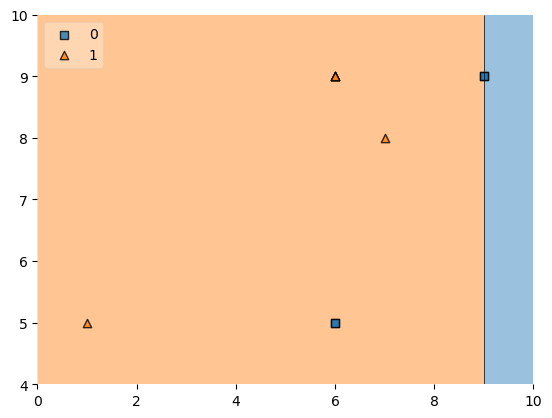

In [56]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [57]:
third_df['y_pred'] = dt3.predict(X)
     

In [58]:
third_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,1


In [59]:
alpha3 = calculate_model_weight(0.6)
alpha3

-0.20273255405408214

In [60]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 -0.20273255405408214


### Prediction

In [61]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [62]:
dt2.predict(query)

array([1], dtype=int64)

In [63]:
dt3.predict(query)

array([1], dtype=int64)

In [64]:
alpha1*1 + alpha2*(1) + alpha3*(1)

0.914063556699465

In [65]:
np.sign(0.914)

1.0

In [66]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [67]:
dt2.predict(query)

array([0], dtype=int64)

In [68]:
dt3.predict(query)
     

array([0], dtype=int64)

In [69]:
alpha1*(-1) + alpha2*(-1) + alpha3*(-1)

-0.914063556699465

In [70]:
np.sign(-0.914)

-1.0

for [1,5] the prediction is 1 so our output also gives 1.
for [9,9] the prediction is 0 so our output also gives -1.0 which is 0